# Data Science Job Salaries 10Alytics Project 

The dataset represents salaries of data professionals from numerous countries from 2020 to 2022. The aim of this project is to derive a detailed analysis of the dataset.

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the dataset
df = pd.read_csv(r"C:\Users\username\Downloads\ds_salaries.csv",index_col=0)

In [3]:
# inspect the dataset 
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
# Check for null values
nan_values_count = df.isnull().sum()
nan_values_count

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Explore features of the dataset
df.describe()

# Convert the remote_ratio column values as 0 -No remote work, 50 -Partially remote, 100 -Fully remote

df['remote_ratio'] = df['remote_ratio'].replace([0,50,100], ['No remote','Partially remote','Fully remote'])
df[['remote_ratio']]

,remote_ratio
0,No remote
1,No remote
2,Partially remote
3,No remote
4,Partially remote
...,...
602,Fully remote
603,Fully remote
604,No remote
605,Fully remote


## Univariate Analysis

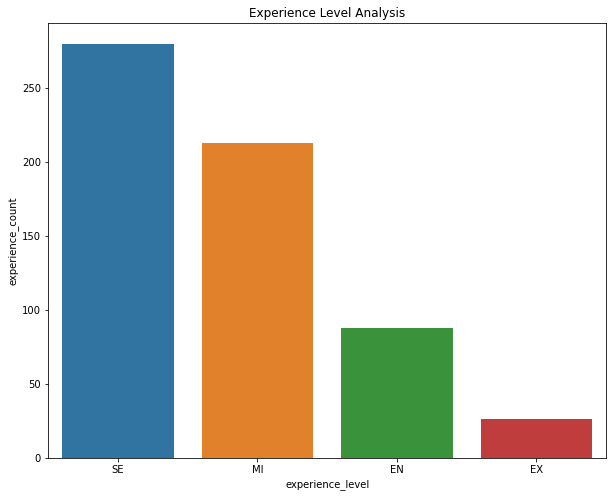

In [7]:
# Experience Level Analysis

exp_level =df.value_counts(['experience_level']).reset_index() 
exp_level.rename(columns={0:'experience_count'},inplace=True)

# Create a barplot
plt.figure(figsize=(10,8))
sns.barplot(data=exp_level,x='experience_level',y='experience_count')
plt.title("Experience Level Analysis")
plt.show()

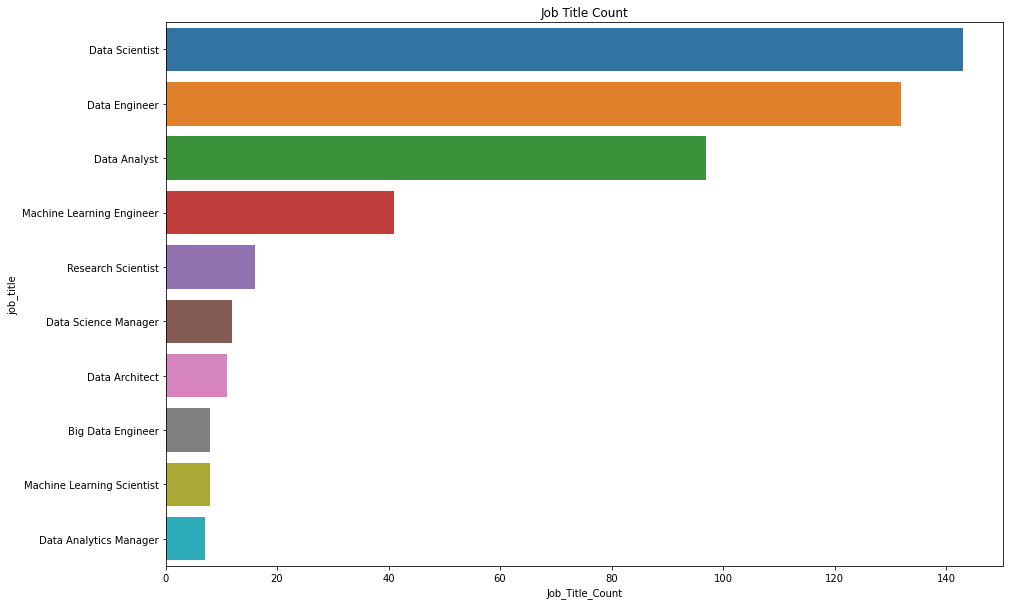

In [8]:
# Job Title Analysis
job_title = df.value_counts(['job_title']).sort_values(ascending=False).to_frame().reset_index()
job_title.rename(columns={0:'Job_Title_Count'},inplace=True)
job_title = job_title.head(10)

plt.figure(figsize=(15,10))
sns.barplot(data=job_title,y='job_title',x='Job_Title_Count',orient='h')
plt.title('Job Title Count')
plt.show()



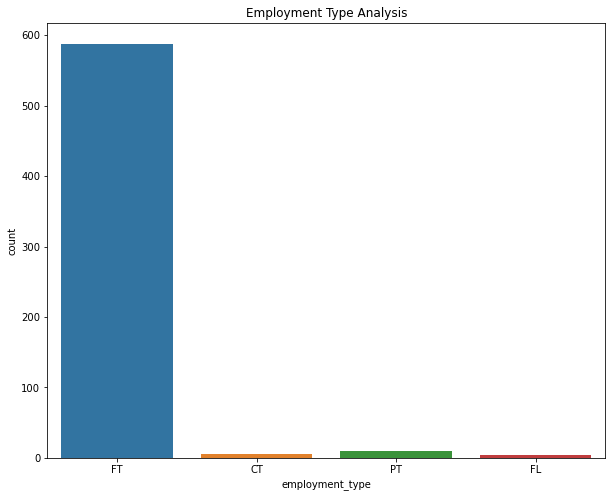

In [9]:
# Employment Type Analysis

plt.figure(figsize=(10,8))
sns.countplot(data=df,x='employment_type')
plt.title('Employment Type Analysis')
plt.show()

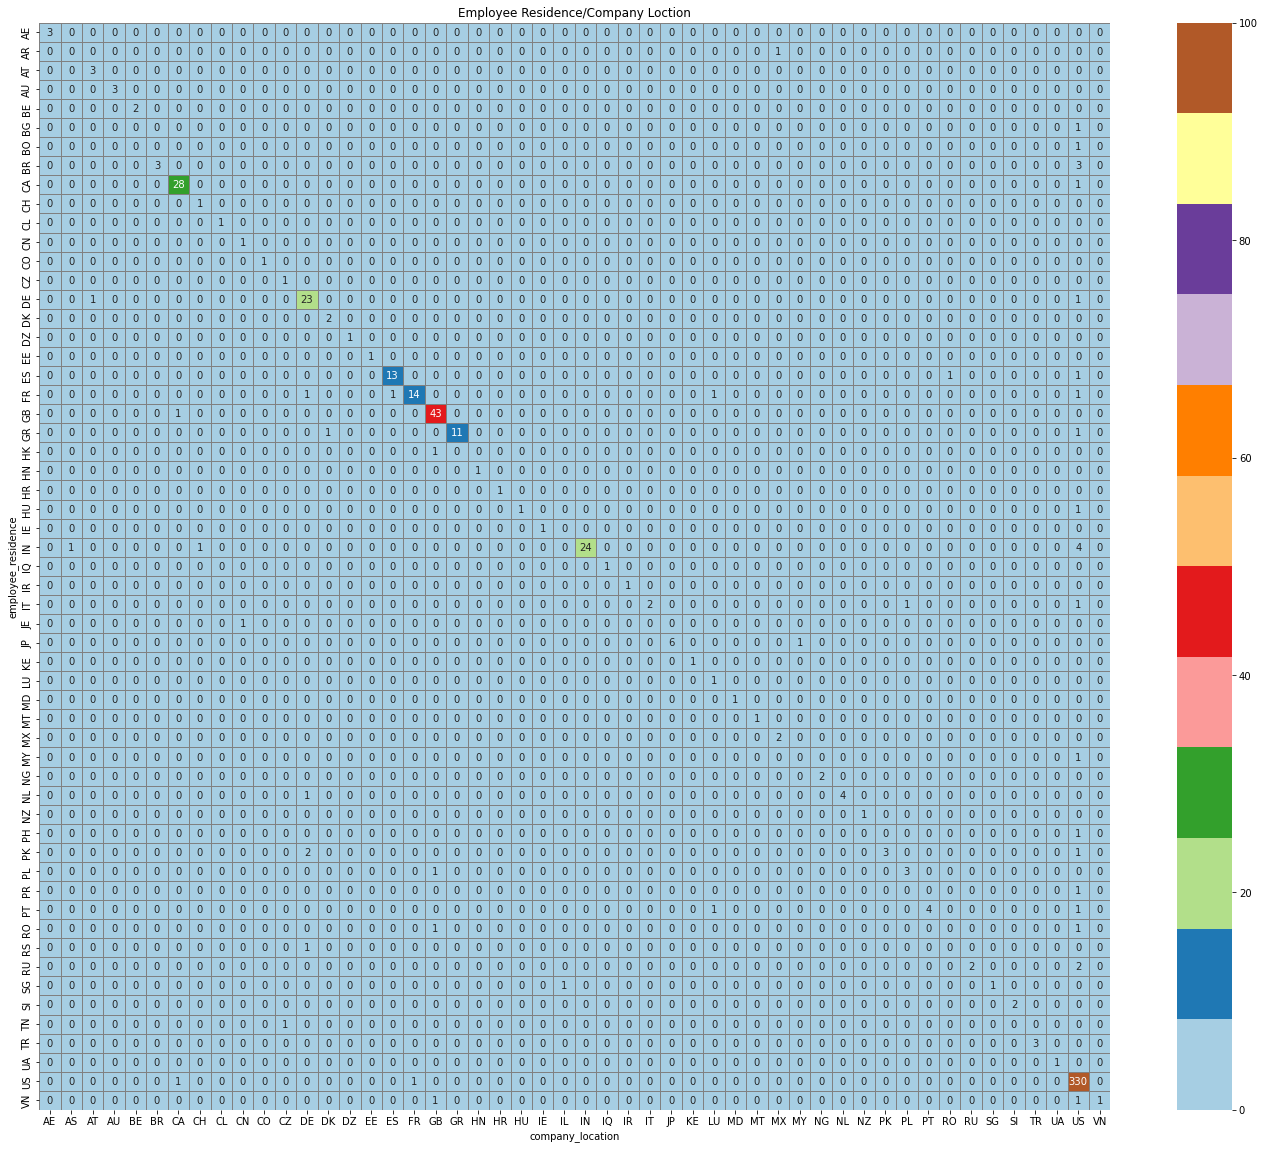

In [10]:
# Employee Residence & Company Location
ct = pd.crosstab(df['employee_residence'], df['company_location'])
plt.figure(figsize=(24,20))
sns.heatmap(ct, cmap='Paired', annot=True, fmt='d', vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Employee Residence/Company Loction')
plt.show()


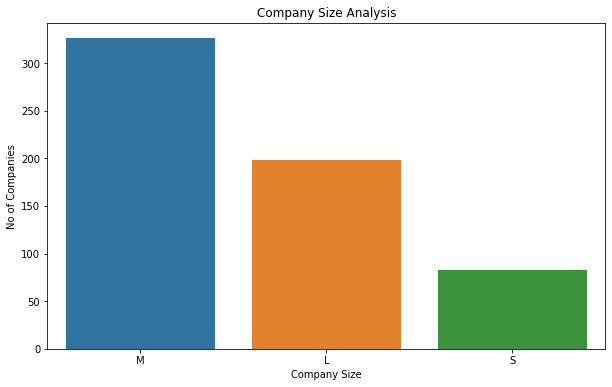

In [11]:
# Company Size Analysis

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='company_size',order=('M','L','S'))
plt.xlabel('Company Size')
plt.ylabel('No of Companies')
plt.title('Company Size Analysis')
plt.show()

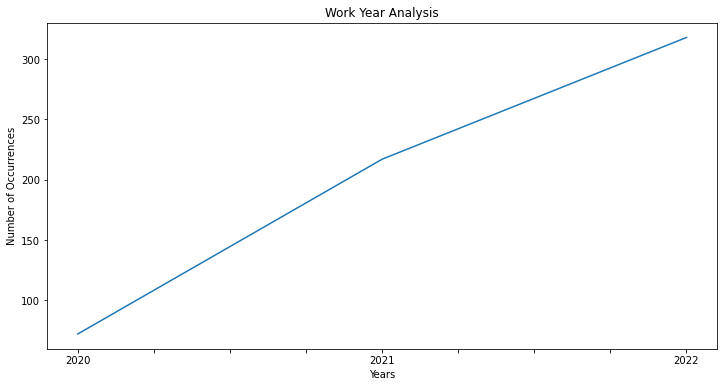

In [12]:
# Work Year Analysis 

plt.figure(figsize=(12,6))
df['work_year'] = df['work_year'].astype(str)
df['work_year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.title('Work Year Analysis')
plt.show()


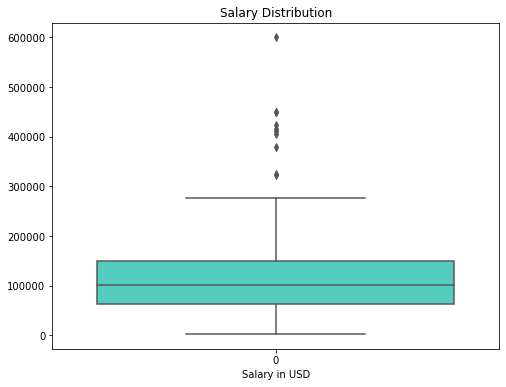

In [13]:
# Salary in USD
plt.figure(figsize=(8,6))
sns.boxplot(data=df['salary_in_usd'],color='Turquoise')
plt.title("Salary Distribution")
plt.xlabel("Salary in USD")
plt.show()


Text(0.5, 1.0, 'Remote Ratio Distribution')

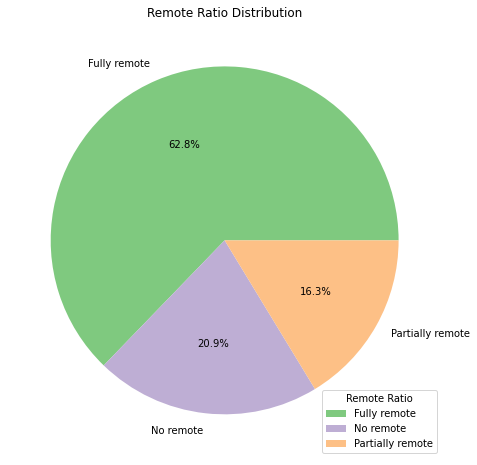

In [14]:
# Remote Ratio Analysis
remote_ratio_count = df['remote_ratio'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(remote_ratio_count, labels=remote_ratio_count.index, colors=sns.color_palette("Accent"),autopct='%1.1f%%')
plt.legend(title='Remote Ratio')
plt.title("Remote Ratio Distribution")



## Work Year Analysis

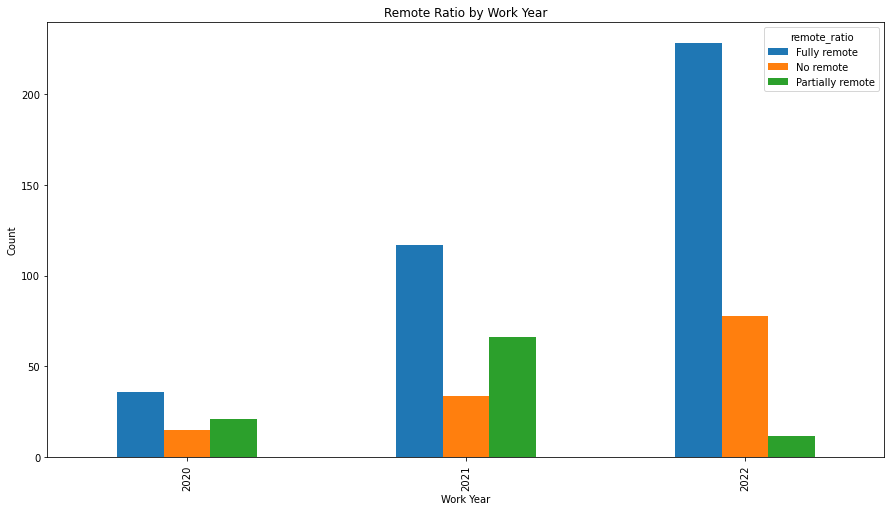

In [15]:
remote_ratio_count = df.groupby(['work_year','remote_ratio']).count()['job_title']
remote_ratio_count = remote_ratio_count.unstack()

fig, ax = plt.subplots(figsize=(15,8))
remote_ratio_count.plot(kind='bar',ax=ax)
plt.xlabel("Work Year")
plt.ylabel("Count")
plt.title("Remote Ratio by Work Year")
plt.show()

## Experience Level Analysis


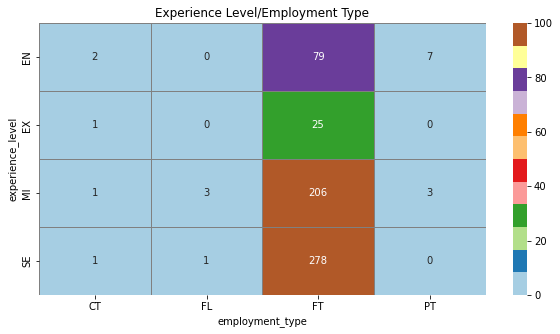

In [16]:
ct2 = pd.crosstab(df['experience_level'], df['employment_type'])
plt.figure(figsize=(10,5))
sns.heatmap(ct2, cmap='Paired', annot=True, fmt='d', vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Experience Level/Employment Type')
plt.show()

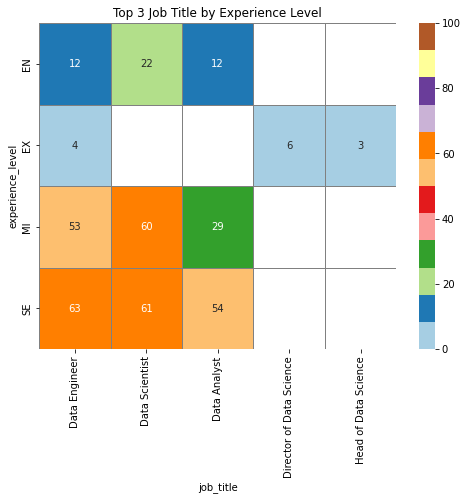

In [17]:
# Top 3 Job Title by Experience Level
job_title_count = df.groupby(['experience_level','job_title']).count()['salary_in_usd']
job_title_count = job_title_count.sort_values(ascending=False)
top_job_title = job_title_count.groupby(level=0).head(3).unstack()


plt.figure(figsize=(8,6))
sns.heatmap(top_job_title, cmap='Paired', annot=True, vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Top 3 Job Title by Experience Level')
plt.show()


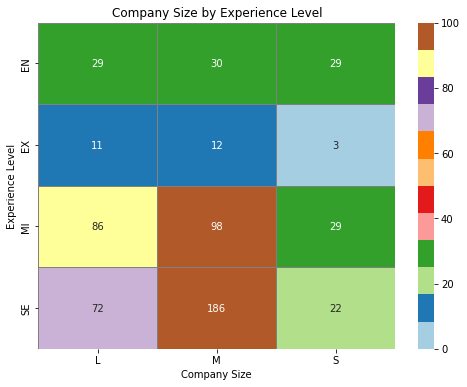

In [18]:
# Company Size by Experience Level

plt.figure(figsize=(8,6))
ct3 = pd.crosstab(df['experience_level'], df['company_size'])
sns.heatmap(ct3,cmap='Paired', annot=True, fmt='d', vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Company Size by Experience Level')
plt.ylabel('Experience Level')
plt.xlabel('Company Size')
plt.show()


## Company Location Analysis

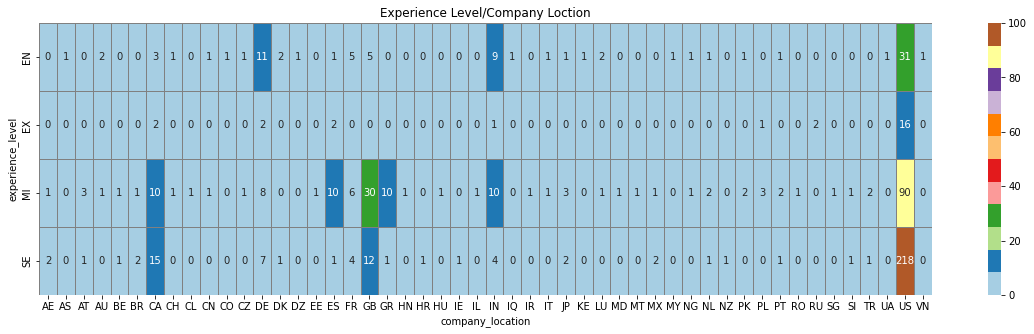

In [19]:

ct4 = pd.crosstab(df['experience_level'], df['company_location'])
plt.figure(figsize=(20,5))
sns.heatmap(ct4, cmap='Paired', annot=True, fmt='d', vmin=0, vmax=100,linewidths=.5, linecolor='gray')
plt.title('Experience Level/Company Loction')
plt.show()


## Salary Analysis

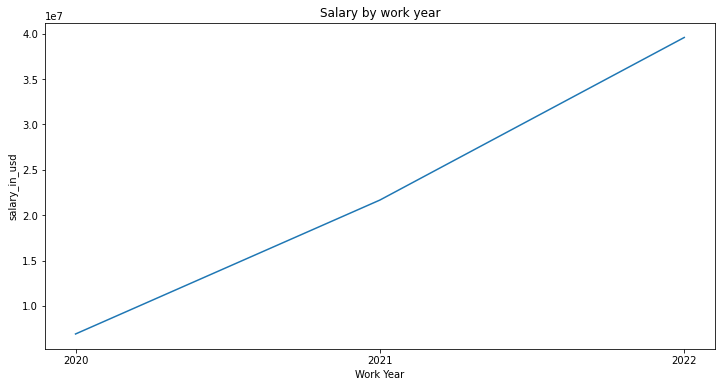

In [20]:
# Salary by work year
salary_work_yr = df.groupby('work_year').sum()['salary_in_usd'].reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data = salary_work_yr, x = 'work_year', y = 'salary_in_usd')
plt.xlabel('Work Year')
plt.title('Salary by work year')
plt.show()



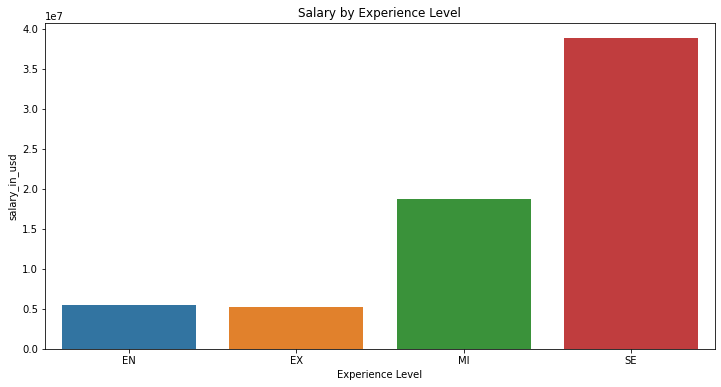

In [21]:
# Salary by Experience Level

salary_exp_level = df.groupby('experience_level').sum()['salary_in_usd'].reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data = salary_exp_level, x = 'experience_level', y = 'salary_in_usd')
plt.xlabel('Experience Level')
plt.title('Salary by Experience Level')
plt.show()


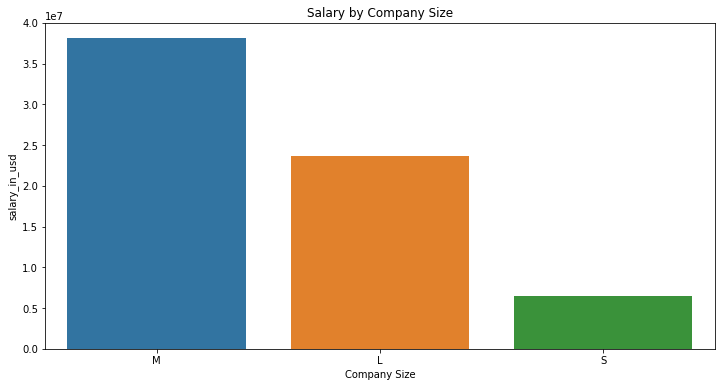

In [22]:
# Salary by Company Size

salary_company_size = df.groupby('company_size').sum()['salary_in_usd'].reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data = salary_company_size, x = 'company_size', y = 'salary_in_usd', order=('M','L','S'))
plt.xlabel('Company Size')
plt.title('Salary by Company Size')
plt.show()


Text(0.5, 1.0, 'Highest salaries by job title')

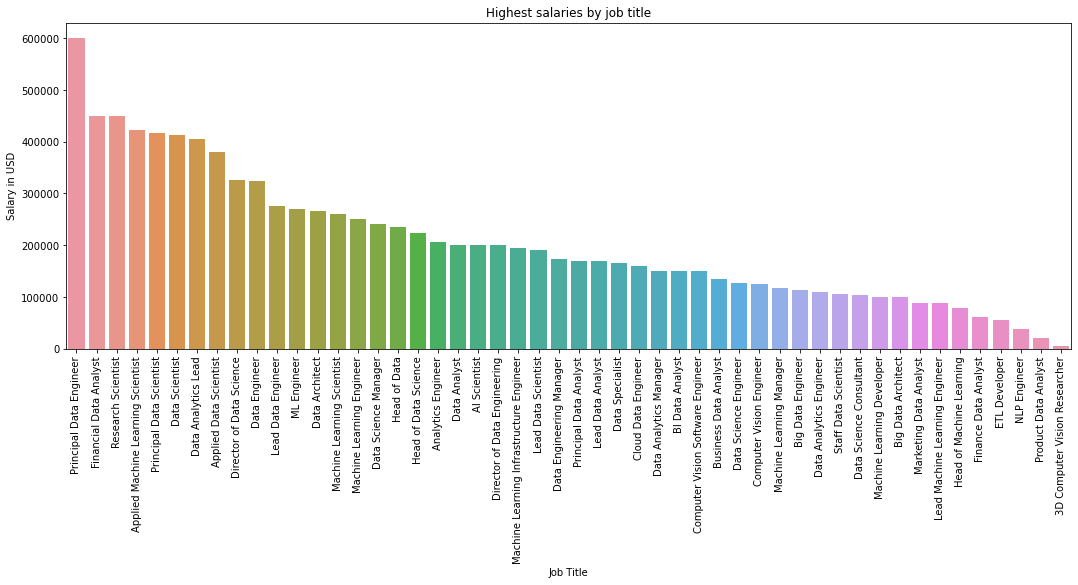

In [23]:
highest_sal = df.groupby(['job_title']).max()['salary_in_usd']
highest_sal = highest_sal.sort_values(ascending=False).reset_index()

plt.figure(figsize=(18,6))
sns.barplot(x='job_title', y='salary_in_usd', data=highest_sal)
plt.xticks(rotation=90)  # rotate x-axis labels for better visibility
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Highest salaries by job title')


Text(0.5, 1.0, 'Average Salary by Company Location')

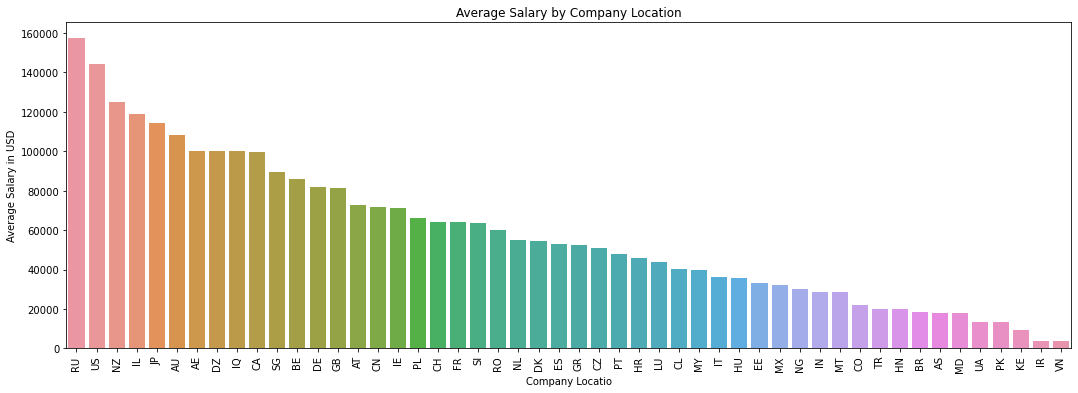

In [24]:
avg_sal = df.groupby(['company_location']).mean()['salary_in_usd']
avg_sal = avg_sal.sort_values(ascending=False).reset_index()

plt.figure(figsize=(18,6))
sns.barplot(x='company_location', y='salary_in_usd', data=avg_sal)
plt.xticks(rotation=90)  # rotate x-axis labels for better visibility
plt.xlabel('Company Locatio')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Location')

## Summry of Findings

The dataset for Data Science Job Salaries covers a period of 3 years, from 2020 to 2022. The data professionals in the dataset are primarily from the US and have a majority of Senior-level and Mid-level experience. The most common Job Titles are Data Scientists, Data Engineers, and Data Analysts. Many of the data professionals in the dataset are Full-time employees and work for medium and small companies.

The dataset shows a steady increase in the number of data professionals, from 72 in 2020 to 217 in 2021, and 318 in 2022. The highest salary earned during the period was USD600,000 , while the lowest was USD2,859, and the average salary was USD101,570. A significant majority (63%) of the data professionals worked fully remotely, while 16% worked partially remotely, and the rest worked on-site.

The analysis of the data by experience level shows that the top 3 job titles across all experience levels are Data Engineers, Data Scientists, and Data Analysts. Most data professionals work with Medium-sized companies, and most of them are Senior-level and Mid-level professionals. The majority of data professionals work in the US, and most of them are Senior-level and Mid-level professionals.

The total salaries earned by data professionals have seen a sharp rise from USD6.8 million in 2020 to USD39.6 million in 2022. Cumulatively, Senior-level professionals earned USD38.8 million, and Mid-level professionals earned USD18.7 million during the 3-year period. The analysis of salary by job title shows that Principal Data Engineers had the highest average salary, followed by Financial Data Analysts, Research Scientists, and Applied Machine Learning Scientists.

In conclusion, the dataset provides a comprehensive look at the data science profession and the trends in the industry. The steady increase in the number of data professionals, the shift towards remote work, and the rise in total salaries earned are all indicative of a growing and lucrative field. To stay competitive in the industry, it is important for data professionals to have a mix of experience, skills, and qualifications that align with the most in-demand job titles, such as Data Engineers, Data Scientists, and Data Analysts.
